<a href="https://colab.research.google.com/github/negar-ai/ML/blob/main/MNIST_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phases:**
1.   import Packages
2.   fetch the Data
3.   train test split
4.   train the model
5.   predict
6.   confusion Matrix

In [ ]:
# import dependencies
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns


In [32]:
# fetch data
mnistNumber = fetch_openml('mnist_784')

In [33]:
# split data into train and test
X, y = mnistNumber.data, mnistNumber.target
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=11)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)

In [ ]:
# use logistic regression for classification the digits
logR = LogisticRegression(solver='saga',max_iter=1000)
logR.fit(x_train,y_train)

<Axes: >

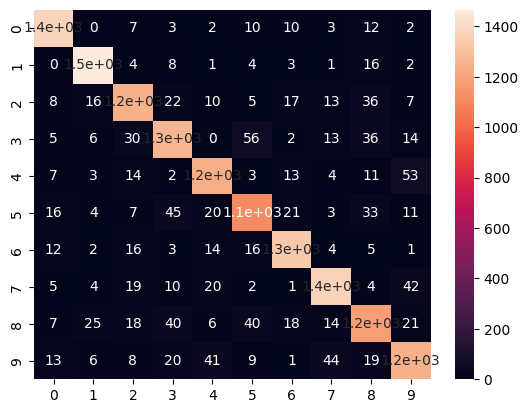

In [35]:
# predict & confusion metrics
y_pred = logR.predict(x_test)
confMat= confusion_matrix(y_test,y_pred)
sns.heatmap(confMat, annot=True)


In [36]:
# compute accuracy and f1_score
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"f1_score: {f1_score(y_test,y_pred,average='weighted')}")

Accuracy: 0.9154285714285715
f1_score: 0.9152665785941803


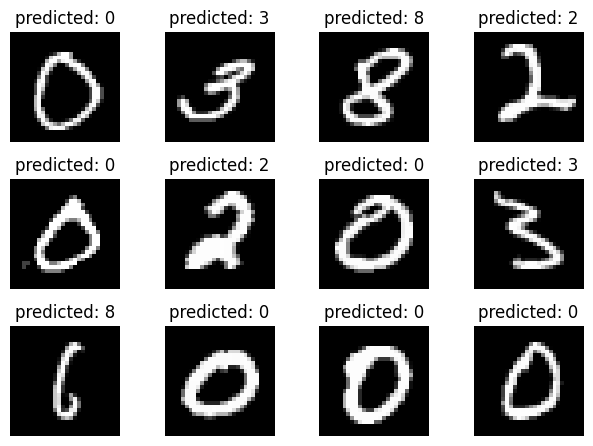

In [ ]:
# Plotting the result
for i in range(12):
  plt.subplot(3,4,1+i)
  plt.imshow(x_test.iloc[i].values.reshape(28,28),cmap='gray')
  plt.title(f"predicted: {y_pred[i]}")
  plt.tight_layout()
  plt.axis('off')